In [1]:
import yt
import os
import time
import h5py
import numpy as np
import pyfftw as ft
import matplotlib
import matplotlib.pyplot as plt
import pyJHTDB
from pyJHTDB.dbinfo import isotropic1024coarse
from pyJHTDB import libJHTDB

In [2]:
N = 1024

In [3]:
start = time.time()

wiz = (b'(fftw-3.3.4 fftw_wisdom #x41ad5c95 #x159437f1 #x23fdee71 #xc6cf4464\n)\n', b'(fftw-3.3.4 fftwf_wisdom #xa84d9475 #xdb220970 #x4aa6f1c4 #xf3163254\n  (fftwf_rdft2_thr_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x0478d9e6 #xffc458b2 #xefeba0c5 #xe8fb2e05)\n  (fftwf_dft_buffered_register 1 #x11bdd #x11bdd #x0 #xb6380734 #x8d827d8e #xdc067a28 #x4fc763de)\n  (fftwf_rdft_rank0_register 4 #x10bdd #x10bdd #x0 #xf3c0402e #xf303d9aa #xbdc22798 #xd9510af9)\n  (fftwf_rdft2_rank_geq2_register 0 #x11bdd #x11bdd #x0 #xe0177557 #xe9f32997 #xfb2dcb2c #xf8f70860)\n  (fftwf_dft_buffered_register 0 #x10bdd #x10bdd #x0 #x3eeb1978 #x428183dc #x2a84fbfa #xe4361ea0)\n  (fftwf_codelet_hc2cb_8 0 #x10bdd #x10bdd #x0 #x48259488 #x196c8c29 #x37f91b06 #x556264da)\n  (fftwf_rdft2_rank_geq2_register 0 #x10bdd #x10bdd #x0 #xb27d35ea #xa96ba975 #x4796bd74 #xae50e653)\n  (fftwf_dft_vrank_geq1_register 0 #x10fdd #x10fdd #x0 #x68ff47a8 #x21bb9e5b #xa20dc9bd #xd2485c0c)\n  (fftwf_codelet_r2cb_8 2 #x10bdd #x10bdd #x0 #x669a3813 #x9ba2bb21 #x64e8656d #x87c9de00)\n  (fftwf_dft_indirect_register 0 #x10bdd #x10bdd #x0 #x9c0e3f58 #x928ea026 #xd28229a3 #x7246e0ac)\n  (fftwf_codelet_q1_4 0 #x10fdd #x10fdd #x0 #xee87b2d5 #x3e497607 #xfff1907f #xf9579a39)\n  (fftwf_dft_vrank_geq1_register 0 #x10fdd #x10fdd #x0 #x8676a7b7 #xe006c70d #x487b0278 #xb2f8f002)\n  (fftwf_rdft2_rank_geq2_register 0 #x10bdd #x10bdd #x0 #xb8bedcad #x45a4525b #xc44e4385 #xa637a3a4)\n  (fftwf_codelet_r2cf_8 2 #x11bdd #x11bdd #x0 #x675249aa #x037557b8 #x14643a4b #x9ea626ef)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #x33c540f7 #x7207139c #x75ca3a4c #x748bc1b6)\n  (fftwf_dft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #xf6843763 #xe67a42c5 #x37896514 #x1934a686)\n  (fftwf_rdft_rank0_register 3 #x10bdd #x10bdd #x0 #x91607aa1 #xd40dae11 #x01dbbb42 #x733d3911)\n  (fftwf_codelet_t1_4 0 #x10fdd #x10fdd #x0 #x1e5fa302 #x4dca4b4b #x68854fe7 #x57f745da)\n  (fftwf_dft_r2hc_register 0 #x11bdd #x11bdd #x0 #x129e3b9a #xbe5c8c09 #x84314e36 #x92c09d6d)\n  (fftwf_rdft2_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x1a3fc773 #x16826a6d #x4ac1ba9b #x71705541)\n  (fftwf_codelet_r2cfII_8 2 #x11bdd #x11bdd #x0 #xc7a8d0be #x7798b669 #x9437b479 #x2ba791fc)\n  (fftwf_dft_nop_register 0 #x11bdd #x11bdd #x0 #x2ca97a7c #x1278c07a #x4b274fea #x63afcfcd)\n  (fftwf_rdft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x2b2a182d #x1a4f0eb8 #x4051bfc8 #x50ede16d)\n  (fftwf_dft_vrank_geq1_register 0 #x10fdd #x10fdd #x0 #x09558463 #xdea41841 #xf014e84a #x343a12e5)\n  (fftwf_dft_buffered_register 0 #x11bdd #x11bdd #x0 #xf6040783 #x4ecac406 #x61d1e470 #xc372144f)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #x37c7ab24 #x6b6a7433 #xbb43af76 #x9bd7720f)\n  (fftwf_codelet_t1_16 0 #x10bdd #x10bdd #x0 #xcd08c9cd #xac2dabe6 #x0a6d47c5 #x5b07814f)\n  (fftwf_dft_nop_register 0 #x10bdd #x10bdd #x0 #xd84e4956 #xbbda597c #x4dcc8ca2 #x8135f48a)\n  (fftwf_dft_nop_register 0 #x11bdd #x11bdd #x0 #xb5f6482a #x970cff75 #xad1e3938 #x526a74d7)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #x54bf9035 #xa469d859 #x8c3af79c #xaabf7edf)\n  (fftwf_codelet_t1_16 0 #x10bdd #x10bdd #x0 #xbf8f2281 #x53d808d5 #x34ab52eb #x747f8bf4)\n  (fftwf_dft_nop_register 0 #x10bdd #x10bdd #x0 #x4c6eda6a #xd64bb98a #xdeff4d47 #xbd9bc277)\n  (fftwf_rdft_rank0_register 2 #x11bdd #x11bdd #x0 #x104e8159 #x92ac0177 #x0f50339e #x2c4a57af)\n  (fftwf_codelet_t1_4 0 #x10fdd #x10fdd #x0 #x914f085b #x7945eab1 #xb24b3509 #x41ff886a)\n  (fftwf_dft_buffered_register 1 #x10bdd #x10bdd #x0 #x7cf6cc98 #x1860681d #x04f92f92 #x64e3787b)\n  (fftwf_codelet_n1_64 0 #x10fdd #x10fdd #x0 #x2d58151a #x7bf279ac #xd05075c9 #x05025c02)\n  (fftwf_codelet_hc2cf_8 0 #x11bdd #x11bdd #x0 #xa3aa3245 #xfa89ad84 #x6f51d136 #x21269ea8)\n  (fftwf_codelet_q1_4 0 #x10fdd #x10fdd #x0 #x6e3f6b00 #xc631065b #xc5ce0991 #xc9e5830a)\n  (fftwf_rdft2_thr_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x245908be #x1b45c309 #xfa989829 #xe3448ecb)\n  (fftwf_dft_thr_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #xce1da3b2 #xb156b9ff #x345deb46 #x24967a68)\n  (fftwf_codelet_n1_64 0 #x10bdd #x10bdd #x0 #xbf36f96d #xc5099024 #xab4588dd #x0f71c101)\n  (fftwf_dft_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #xca4b9bb9 #x447b7ee5 #xbb98516b #x49ee082c)\n  (fftwf_rdft_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x2fdf6c57 #xa3a423cb #x3c83b16e #xd62995da)\n  (fftwf_dft_indirect_register 0 #x10bdd #x10bdd #x0 #x938d7e18 #x1343c0de #xbe03a120 #x64e734a9)\n  (fftwf_codelet_n1_64 0 #x10fdd #x10fdd #x0 #xee00c037 #x8d699089 #xad7ad6a0 #x4efaaf7d)\n  (fftwf_dft_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x1fe15182 #x5f3d421c #xba834eb6 #x2292df94)\n  (fftwf_rdft2_rank_geq2_register 0 #x11bdd #x11bdd #x0 #xbd6b8262 #xabd0b6b7 #xe6ad6d03 #x628df7dc)\n  (fftwf_rdft_rank0_register 2 #x10bdd #x10bdd #x0 #x104e8159 #x92ac0177 #x0f50339e #x2c4a57af)\n  (fftwf_rdft2_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x32025de0 #x37ce7b0a #x95c084dd #xcd18ab21)\n  (fftwf_codelet_r2cb_128 0 #x10bdd #x10bdd #x0 #x673294cd #xe5b085a3 #xb8a774bf #xfd19dfb2)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #x3c666628 #x01043fe7 #x20ba9e85 #x1f9b67a1)\n  (fftwf_codelet_r2cbIII_8 2 #x10bdd #x10bdd #x0 #xfb67696a #x19d836b7 #x6b24c329 #xe4fc2e8b)\n  (fftwf_rdft_rank0_register 3 #x11bdd #x11bdd #x0 #x91607aa1 #xd40dae11 #x01dbbb42 #x733d3911)\n  (fftwf_dft_r2hc_register 0 #x11bdd #x11bdd #x0 #x38a08196 #x2a4ca72e #x2d1ba440 #x10600d8c)\n  (fftwf_codelet_n1_64 0 #x10bdd #x10bdd #x0 #x1913d4ac #xf2d50866 #xc504d3dd #x76d5edcd)\n  (fftwf_dft_vrank_geq1_register 0 #x10fdd #x10fdd #x0 #x411f7a68 #x161cf1d6 #xbec2d98e #x7d9fdffa)\n  (fftwf_dft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x89cb22ca #x6491b1a8 #xf5f7b0be #x3cd19d43)\n  (fftwf_dft_thr_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x519e2811 #xfd996521 #x222afcf1 #xa289f0a6)\n  (fftwf_codelet_r2cf_128 0 #x11bdd #x11bdd #x0 #x23eb177d #x111d2c06 #xa78f35fb #xd56dcd76)\n)\n', b'(fftw-3.3.4 fftwl_wisdom #x0821b5c7 #xa4c07d5a #x21b58211 #xebe513ab\n)\n')
ft.import_wisdom(wiz)
w2 = np.zeros((N,N,N), dtype='float32')
S2 = np.zeros((N,N,N), dtype='float32')
fo = ft.zeros_aligned((N,N,N), dtype='float32')
bo = ft.zeros_aligned((N,N,N//2+1), dtype='complex64')
fft_object = ft.FFTW(fo,bo,axes=(0,1,2), direction='FFTW_FORWARD', flags=('FFTW_MEASURE', ),threads=8)
ifft_object = ft.FFTW(bo,fo,axes=(0,1,2), direction='FFTW_BACKWARD', flags=('FFTW_MEASURE', ),threads=8)

end = time.time()
print(end-start)

63.85777997970581


In [8]:
start = time.time()

nproc = 8
nx = N//nproc

lw2 = ft.zeros_aligned((N//nproc,N,N), dtype='float32')

folder = '/home/idies/workspace/scratch'

for k in range(nproc):
    filename = 'menger-sponge-'+str(k)+'.npz'
    file = folder+'/'+filename
    
    content = np.load(file)
    lw2[:,:,:] = content['lchi']
    
    w2[k*nx:(k+1)*nx,:,:] = lw2[:,:,:]
    
end = time.time()
print(end-start)

39.72020077705383


In [9]:
del lw2

In [10]:
chi = np.zeros((N,N,N))

In [11]:
chi[:,:,:] = w2[:,:,:]

In [12]:
chisl = chi[0+64:256+64,0:256,0:256] + 0.05

In [13]:
data = dict(enstrophy = (chisl, "s**(-2)"))
bbox = np.array([[0,2*np.pi/4], [0,2*np.pi/4], [0,2*np.pi/4]])
ds = yt.load_uniform_grid(data, (256,256,256), length_unit="m", bbox=bbox, nprocs=8)

yt : [INFO     ] 2017-03-20 18:15:11,434 Parameters: current_time              = 0.0
yt : [INFO     ] 2017-03-20 18:15:11,437 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2017-03-20 18:15:11,440 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2017-03-20 18:15:11,443 Parameters: domain_right_edge         = [ 1.57079633  1.57079633  1.57079633]
yt : [INFO     ] 2017-03-20 18:15:11,445 Parameters: cosmological_simulation   = 0.0


In [14]:
w2min = np.min(chisl)
w2max = np.max(chisl)

/home/idies/anaconda3/lib/python3.5/site-packages/yt/units/yt_array.py:990: RuntimeWarning: invalid value encountered in true_divide
  return super(YTArray, self).__truediv__(ro)
/home/idies/anaconda3/lib/python3.5/site-packages/matplotlib/scale.py:101: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300
yt : [INFO     ] 2017-03-20 18:18:12,184 Rendering scene (Can take a while).
yt : [INFO     ] 2017-03-20 18:18:12,251 Creating volume
/home/idies/anaconda3/lib/python3.5/site-packages/yt/utilities/amr_kdtree/amr_kdtree.py:311: RuntimeWarning: invalid value encountered in log10
  dds.append(np.log10(vcd[field].astype('float64')))


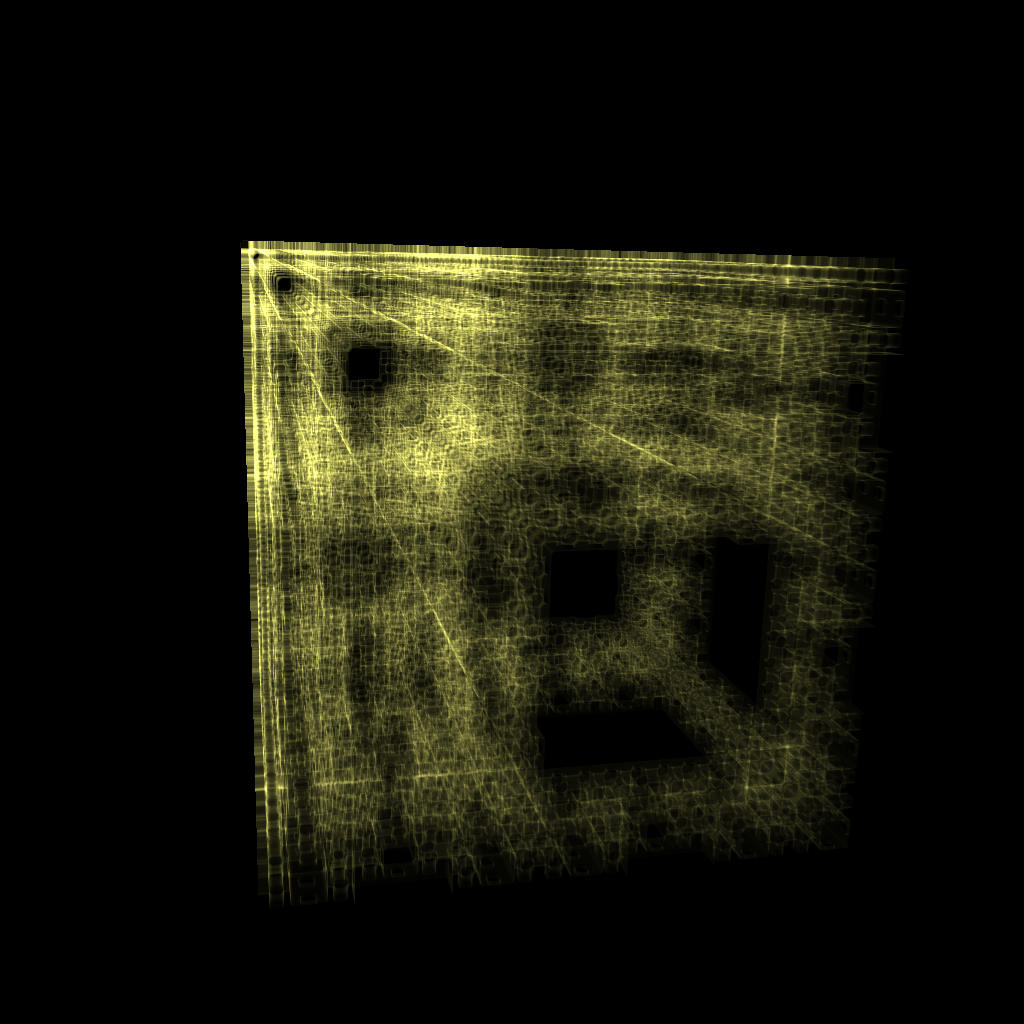

yt : [INFO     ] 2017-03-20 18:18:22,615 Rendering scene (Can take a while).
yt : [INFO     ] 2017-03-20 18:18:28,836 Saving render menger-sponger-yt.png


In [18]:
##############################################
### Create the base scene from the dataset ###
##############################################

sc = yt.create_scene(ds,'enstrophy', lens_type='perspective')

#############################################
### Camera, Focus and Orientation Options ###
#############################################

zom = 0.8
sc.camera.resolution = (1024, 1024)
sc.camera.set_position(np.array([-2*np.pi/4,0.0,0.0])) 

sc.camera.set_focus(ds.domain_center) 
sc.camera.roll(0.5*np.pi/2)

sc.camera.zoom(1.1)

#########################################
### Transfer Function / Color Options ###
#########################################

source = sc[0]

tf = yt.ColorTransferFunction(np.log10((w2min,w2max)))
tf.add_layers(2, colormap='inferno')
source.tfh.tf = tf
source.tfh.bounds = (w2min,w2max)

source.tfh.set_log(True)
source.tfh.grey_opacity = False
source.tfh.plot('transfer_function.png',profile_field='enstrophy')

#######################################
### Showing and rendering the scene ###
#######################################

sc.show(sigma_clip=4.0)
sc.save('menger-sponger-yt.png',sigma_clip=2.0)

In [19]:
X = np.zeros((N,N,N))
Y = np.zeros((N,N,N))
Z = np.zeros((N,N,N))

In [20]:
start = time.time()

for i in range(N):
    X[i,:,:] = i*isotropic1024coarse['dx']
    
for j in range(N):
    Y[:,j,:] = j*isotropic1024coarse['dy']
    
for k in range(N):
    Z[:,:,k] = k*isotropic1024coarse['dz']

end = time.time()
print(end-start)

361.0689060688019


In [21]:
dx = 1/N
ner = int(512*np.sqrt(3))

r2 = np.zeros((N//2,N//2,N//2), dtype='float32')
iCorr = np.zeros((N//2,N//2,N//2), dtype='float32')
r2[:,:,:] = X[0:N//2,0:N//2,0:N//2]**2+Y[0:N//2,0:N//2,0:N//2]**2+Z[0:N//2,0:N//2,0:N//2]**2
r2rt = np.sqrt(r2)
minrt = np.min(r2rt)
maxrt = np.max(r2rt)
rbins = np.linspace(minrt,maxrt,1+ner)

In [23]:
start = time.time()

chi = np.zeros((N,N,N))
chi[:,:,:] = w2[:,:,:] #ft.zeros_aligned((N,N,N), dtype='float32')
cchi = ft.zeros_aligned((N,N,1+(N//2)), dtype='complex64')
corr = ft.zeros_aligned((N,N,N),dtype='float32')

end = time.time()
print("time : "+str(end-start))

time : 106.95506811141968


In [24]:
iCorr = np.zeros((N//2,N//2,N//2),dtype='float32')

In [25]:
start = time.time()

fo[:,:,:] = chi[:,:,:]
fft_object.update_arrays(fo,bo)
fft_object.execute()
cchi[:,:,:] = bo[:,:,:]
    
tmp = cchi*(cchi.conj())
    
bo[:,:,:] = tmp[:,:,:]
ifft_object.update_arrays(bo,fo)
ifft_object.execute()
corr[:,:,:] = fo[:,:,:]/(N**3)
    
iCorr[0:(N//2),0:(N//2),0:(N//2)] = corr[0:(N//2),0:(N//2),0:(N//2)] 
    
corrLoc,redges = np.histogram(r2rt,range=(minrt,maxrt),bins = rbins,weights=iCorr)
r2Loc,r2edges  = np.histogram(r2rt,range=(minrt,maxrt),bins = rbins)

end = time.time()
print("time : "+str(end-start))

time : 316.00790095329285


Linear fit [alpha A] = [-0.25885071  0.11923528]


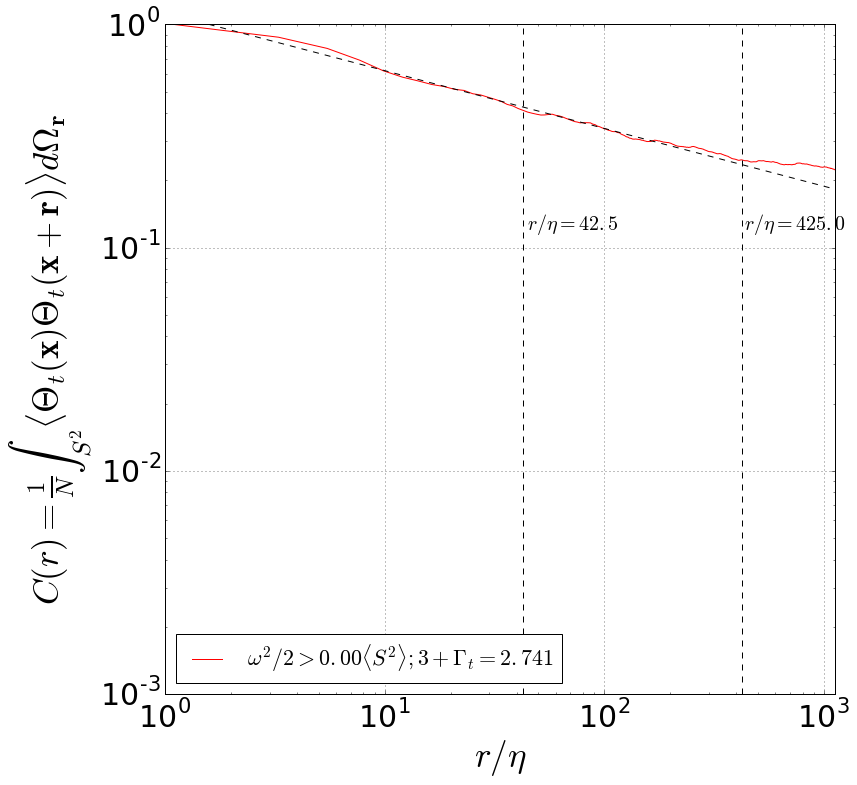

In [55]:
eta = 0.00280

c  = ['r','g','b','m','c','y','r','g','b']

plt.figure(figsize=(12,12))
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30) 

rbins = np.linspace(minrt,maxrt,1+ner)

bins = (rbins[0:ner]+rbins[1:ner+1])/2
tempRp = bins[(bins/eta>2.5)&(bins/eta<225)]/eta

plt.figure(figsize=(12,12))
plt.xlabel(r'$r/\eta$', fontsize=35)
plt.ylabel(r'$C(r) = \frac{1}{N} \int_{S^2} \langle\Theta_t({\bf x})\Theta_t({\bf x}+{\bf r}) \rangle d\Omega_{\bf r}$', fontsize=35)
plt.xlim([1,np.pi/eta])
plt.ylim([10**(-3),10**(0)])
plt.grid()
    
corrF = corrLoc/r2Loc
tempCorrF = corrF[(bins/eta>2.5)&(bins/eta<225)]
    
fit = np.polyfit(np.log(tempRp),np.log(tempCorrF/corrF[0]),1)
print("Linear fit [alpha A] = "+str(fit))
plt.loglog(bins/eta,(corrF)/(corrF[0]),'r',label=r'$ \omega^2/2 > {two:.2f}\langle S^2\rangle; 3+\Gamma_t = {three:.3f}$'.format(two=0,three=3+fit[0]))
plt.loglog(bins/eta,np.exp(fit[1])*((bins/eta)**(fit[0])),'k--')
    
plt.axvline(x=42.50, color='k', linestyle='--')
plt.axvline(x=425.0, color='k', linestyle='--')
plt.text(44.5, 0.12, r'$r/\eta = 42.5$', fontsize=20)
plt.text(435., 0.12, r'$r/\eta = 425.0$', fontsize=20)
plt.legend(loc='lower left',prop={'size':22})
plt.savefig('menger-sponge.pdf', format='pdf', bbox_inches='tight', transparent=True)

In [32]:
scales = []
BoxL = isotropic1024coarse['lx']
x0 = y0 = z0 = 0.

L = BoxL/2.

x1 = x0+isotropic1024coarse['lx']
y1 = y0+isotropic1024coarse['ly']
z1 = z0+isotropic1024coarse['lz']

nx = int((x1-x0)/L)+1
ny = int((y1-y0)/L)+1
nz = int((z1-z0)/L)+1

x1 = x0 + nx*L
y1 = y0 + ny*L 
z1 = z0 + nz*L

In [34]:
Xs = X[w2 > 0.0]
Ys = Y[w2 > 0.0]
Zs = Z[w2 > 0.0]

In [35]:
eta = 0.00287
hist = np.zeros((Xs.shape[0],3))
scales = np.logspace(np.log(2*425*eta),np.log(0.1*42.5*eta), num=250, endpoint=True, base=np.e)

In [36]:
hist[:,0] = Xs[:]
hist[:,1] = Ys[:]
hist[:,2] = Zs[:]

start0 = time.time()

count = []
for L in scales:
    start = time.time()
    
    x1 = x0+isotropic1024coarse['lx']
    y1 = y0+isotropic1024coarse['ly']
    z1 = z0+isotropic1024coarse['lz']
    
    nx = int((x1-x0)/L)+1
    ny = int((y1-y0)/L)+1
    nz = int((z1-z0)/L)+1
    
    x1 = x0 + nx*L
    y1 = y0 + ny*L 
    z1 = z0 + nz*L
    
    H, edges = np.histogramdd(hist, bins=(nx,ny,nz), range=((x0,x1),(y0,y1),(z0,z1)), normed=True)
    
    Hn = H[:]
    Hn[Hn>0] = 1
    numBox = np.sum(Hn)
    
    count.append(numBox)
    end = time.time()
    
end0 = time.time()
print("Total = ",end0-start0)

Total =  23960.875527620316


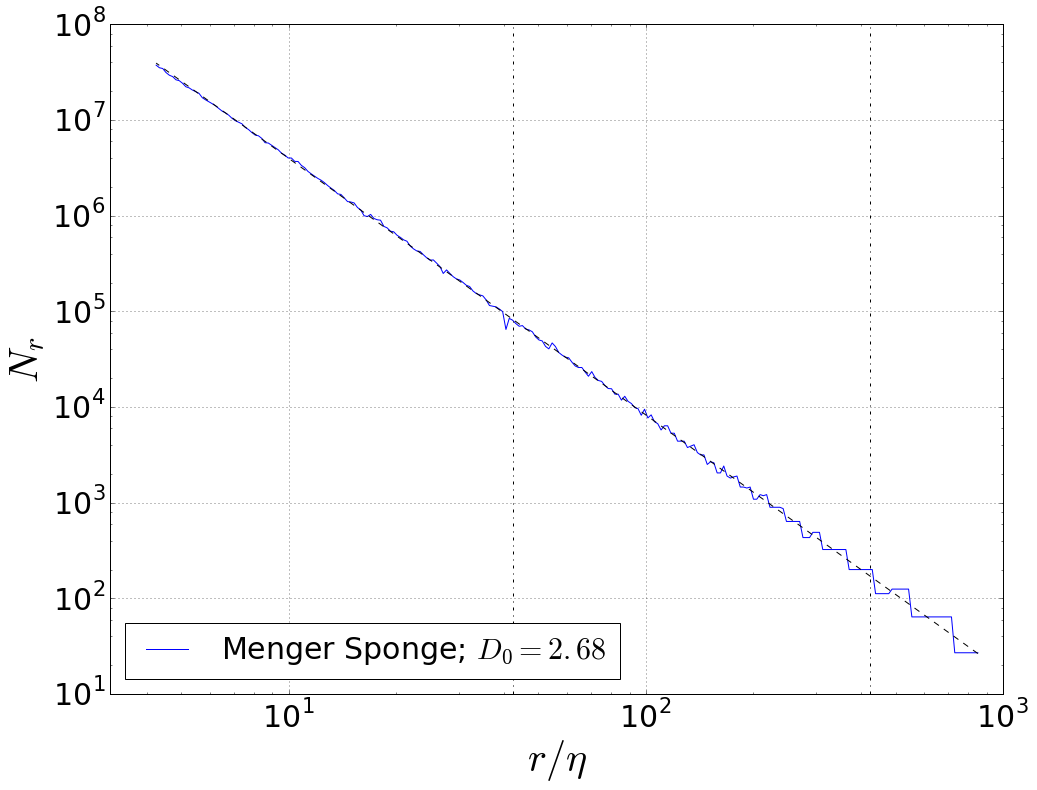

In [51]:
scales = np.array(scales)
count = np.array(count)

fig = plt.figure(figsize=(16,12))
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30)      
plt.xlabel(r'$r/\eta$',size=40)
plt.ylabel(r'$N_r$',size=40)
plt.xlim([10**(0.5),10**3])
plt.ylim([10**(1),10**8])

#idx = scales<400.*eta
Idx = scales>300.*eta

fit = np.polyfit(np.log(scales),np.log(count),1)    
    
plt.loglog(scales/eta,count,'-',label=r'Menger Sponge; $D_0 = {:6.2f}$ '.format(-fit[0]))
plt.loglog(scales/eta,np.exp(fit[1])*(scales**(fit[0])),'k--')    
#plt.loglog(scales[scales>100*eta]/eta,np.exp(Fit[1])*(scales[scales>100*eta]**(Fit[0])),'k--')
    
plt.grid()
plt.axvline(x=42.5,color='k', linestyle='-.')
plt.axvline(x=425.,color='k', linestyle='-.')
plt.legend(loc='lower left',prop={'size':30},ncol=2)
plt.savefig('boxcount-menger-sponge.pdf', format='pdf', bbox_inches='tight', transparent=True)